In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('data/dls_raw_table.csv', delimiter=';').dropna(axis=0, how = 'all')
df = df.drop(columns=['Aggregation Index'])
df['Record'] = df['Record'].astype(int)
df

,Record,Type,Sample Name,Measurement Date and Time,T,Z-Ave,PdI,Pk 1 Mean Int,Pk 2 Mean Int,Pk 3 Mean Int,Pk 1 Area Int,Pk 2 Area Int,Pk 3 Area Int,Scattering Angle,"C(SR3), g/L","C(DNA), g/L","c(HA), g/L"
0,8,Size,0.25DNACHIT 1,11. huhtikuuta 2024 12:53:16,25,"83,82","0,219","101,8",3121,0,"96,9","3,1",0,173.0,"0,0183","0,122",0
1,9,Size,0.25DNACHIT 2,11. huhtikuuta 2024 12:55:49,25,"84,61","0,199","104,2",0,0,100,0,0,173.0,"0,0183","0,122",0
2,10,Size,0.25DNACHIT 3,11. huhtikuuta 2024 12:58:22,25,"85,4","0,21","100,5",5169,0,99,1,0,173.0,"0,0183","0,122",0
3,14,Size,0.5DNACHIT 1,11. huhtikuuta 2024 13:28:35,25,"93,75","0,148","112,1",0,0,100,0,0,173.0,"0,0323","0,108",0
4,15,Size,0.5DNACHIT 2,11. huhtikuuta 2024 13:30:37,25,"92,29","0,141","107,5",0,0,100,0,0,173.0,"0,0323","0,108",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,311,Size,1(6.5) 1,6. toukokuuta 2024 13:54:10,25,2259,1,"817,6",0,0,100,0,0,173.0,"0,1","0,04","0,025"
133,312,Size,1(6.5) 2,6. toukokuuta 2024 13:54:52,"25,1",2465,1,"896,9",0,0,100,0,0,173.0,"0,1","0,04","0,025"
134,325,Size,4(6.5) 1,6. toukokuuta 2024 14:35:02,"25,1",3487,1,"396,1",0,0,100,0,0,173.0,"0,1","0,01","0,05"
135,326,Size,4(6.5) 2,6. toukokuuta 2024 14:37:05,25,3100,1,"420,8",0,0,100,0,0,173.0,"0,1","0,01","0,05"


In [3]:
correlograms = pd.read_csv('data/correlograms.csv', delimiter=';')
for column in correlograms.columns:
    correlograms[column] = correlograms[column].str.replace(',', '.')
    correlograms[column]=pd.to_numeric(correlograms[column])
correlograms

,X Lag Time,Record 8: 0.25DNACHIT 1,Record 9: 0.25DNACHIT 2,Record 10: 0.25DNACHIT 3,Record 14: 0.5DNACHIT 1,Record 15: 0.5DNACHIT 2,Record 16: 0.5DNACHIT 3,Record 17: 1DNACHIT 1,Record 18: 1DNACHIT 2,Record 19: 1DNACHIT 3,...,Record 358: 13.05 ExHA 1,Record 359: 14.05 1 1,Record 360: 14.05 1 2,Record 361: 14.05 1 3,Record 365: 14.05 1 1,Record 366: 14.05 1 2,Record 367: 14.05 1 3,Record 368: 14.05 2 1,Record 369: 14.05 2 2,Record 370: 14.05 2 3
0,0.5,0.911,0.913,0.913,0.862,0.863,0.862,0.907,0.901,0.904,...,0.966,0.449,0.481,0.184,0.930,0.925,0.926,0.950,0.947,0.940
1,1.0,0.913,0.916,0.916,0.871,0.870,0.871,0.913,0.906,0.908,...,0.973,0.457,0.490,0.191,0.936,0.934,0.931,0.953,0.950,0.943
2,1.5,0.912,0.913,0.911,0.867,0.866,0.867,0.909,0.903,0.907,...,0.973,0.457,0.490,0.190,0.931,0.929,0.929,0.952,0.946,0.940
3,2.0,0.906,0.907,0.907,0.863,0.863,0.864,0.905,0.901,0.902,...,0.972,0.458,0.489,0.191,0.929,0.927,0.927,0.950,0.947,0.943
4,2.5,0.901,0.905,0.902,0.861,0.860,0.860,0.904,0.897,0.901,...,0.969,0.457,0.490,0.191,0.928,0.924,0.926,0.948,0.943,0.937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,41900000.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
187,46100000.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
188,50300000.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
189,54500000.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [4]:
# Step 1: Extract the list of record numbers from df['Records']
record_numbers = df['Record'].tolist()

# Step 2: Filter the columns in correlograms, including 'X Lag Time'
filtered_columns = [col for col in correlograms.columns if 'X Lag Time' in col or any(f'Record {record}: ' in col for record in record_numbers)]

# Step 3: Select only these columns from correlograms
correlograms = correlograms[filtered_columns]

# Step 4: Rename the columns to only the record number, except for 'X Lag Time'
new_column_names = {col: int(col.split()[1].strip(':')) if 'Record' in col else col for col in filtered_columns}
correlograms = correlograms.rename(columns=new_column_names)

In [5]:
correlograms

,X Lag Time,8,9,10,14,15,16,17,18,19,...,306,307,308,309,310,311,312,325,326,327
0,0.5,0.911,0.913,0.913,0.862,0.863,0.862,0.907,0.901,0.904,...,0.847,0.836,0.918,0.894,0.899,0.931,0.841,0.816,0.760,0.748
1,1.0,0.913,0.916,0.916,0.871,0.870,0.871,0.913,0.906,0.908,...,0.853,0.843,0.924,0.904,0.909,0.939,0.848,0.827,0.771,0.758
2,1.5,0.912,0.913,0.911,0.867,0.866,0.867,0.909,0.903,0.907,...,0.850,0.840,0.924,0.903,0.907,0.939,0.852,0.826,0.770,0.758
3,2.0,0.906,0.907,0.907,0.863,0.863,0.864,0.905,0.901,0.902,...,0.848,0.837,0.924,0.901,0.907,0.940,0.849,0.826,0.770,0.758
4,2.5,0.901,0.905,0.902,0.861,0.860,0.860,0.904,0.897,0.901,...,0.847,0.835,0.924,0.902,0.905,0.940,0.849,0.827,0.770,0.758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,41900000.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
187,46100000.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
188,50300000.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
189,54500000.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


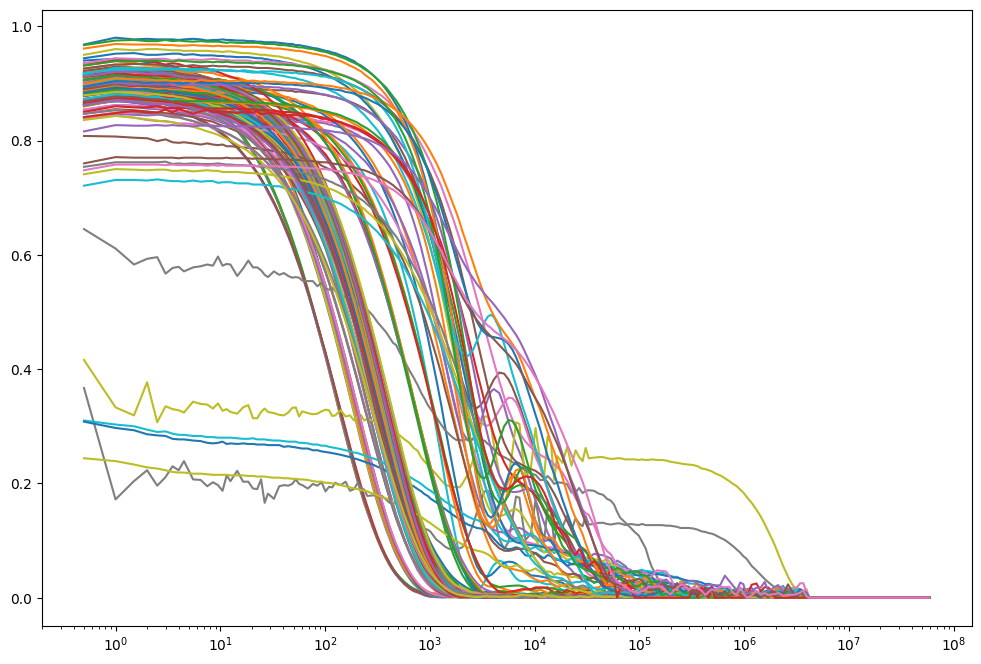

In [6]:
plt.figure(figsize=(12, 8))
for column in correlograms.columns[1:]:
    plt.plot(correlograms['X Lag Time'], correlograms[column], label=column)
plt.xscale('log',base=10)
plt.show()

In [7]:
size_distrib = pd.read_csv('data/size_distrib.csv', delimiter=';')

size_distrib=size_distrib.astype(str)
size_distrib



,X Intensity,Record 8: 0.25DNACHIT 1,Record 9: 0.25DNACHIT 2,Record 10: 0.25DNACHIT 3,Record 14: 0.5DNACHIT 1,Record 15: 0.5DNACHIT 2,Record 16: 0.5DNACHIT 3,Record 17: 1DNACHIT 1,Record 18: 1DNACHIT 2,Record 19: 1DNACHIT 3,...,Record 358: 13.05 ExHA 1,Record 359: 14.05 1 1,Record 360: 14.05 1 2,Record 361: 14.05 1 3,Record 365: 14.05 1 1,Record 366: 14.05 1 2,Record 367: 14.05 1 3,Record 368: 14.05 2 1,Record 369: 14.05 2 2,Record 370: 14.05 2 3
0,"0,4",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"0,463",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"0,536",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"0,621",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"0,719",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,"4,80E+03","0,311",0,"0,325",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,"5,56E+03","0,269",0,"0,586",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,"6,44E+03",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,"7,46E+03",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Replace commas with periods
for column in size_distrib.columns:
    size_distrib[column] = size_distrib[column].str.replace(',', '.')
    size_distrib[column] = size_distrib[column].astype(float)


In [9]:
size_distrib

,X Intensity,Record 8: 0.25DNACHIT 1,Record 9: 0.25DNACHIT 2,Record 10: 0.25DNACHIT 3,Record 14: 0.5DNACHIT 1,Record 15: 0.5DNACHIT 2,Record 16: 0.5DNACHIT 3,Record 17: 1DNACHIT 1,Record 18: 1DNACHIT 2,Record 19: 1DNACHIT 3,...,Record 358: 13.05 ExHA 1,Record 359: 14.05 1 1,Record 360: 14.05 1 2,Record 361: 14.05 1 3,Record 365: 14.05 1 1,Record 366: 14.05 1 2,Record 367: 14.05 1 3,Record 368: 14.05 2 1,Record 369: 14.05 2 2,Record 370: 14.05 2 3
0,0.400,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.463,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.536,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.621,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.719,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,4800.000,0.311,0.0,0.325,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,5560.000,0.269,0.0,0.586,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,6440.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,7460.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Step 2: Filter the columns in correlograms, including 'X Lag Time'
filtered_columns = [col for col in size_distrib.columns if 'X Intensity' in col or any(f'Record {record}: ' in col for record in record_numbers)]

# Step 3: Select only these columns from correlograms
size_distrib = size_distrib[filtered_columns]

# Step 4: Rename the columns to only the record number, except for 'X Lag Time'
new_column_names = {col: int(col.split()[1].strip(':')) if 'Record' in col else col for col in filtered_columns}
size_distrib = size_distrib.rename(columns=new_column_names)

In [11]:
#TODO: convert values to numeric
size_distrib


,X Intensity,8,9,10,14,15,16,17,18,19,...,306,307,308,309,310,311,312,325,326,327
0,0.400,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.463,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.536,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.621,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.719,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,4800.000,0.311,0.0,0.325,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,5560.000,0.269,0.0,0.586,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,6440.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,7460.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


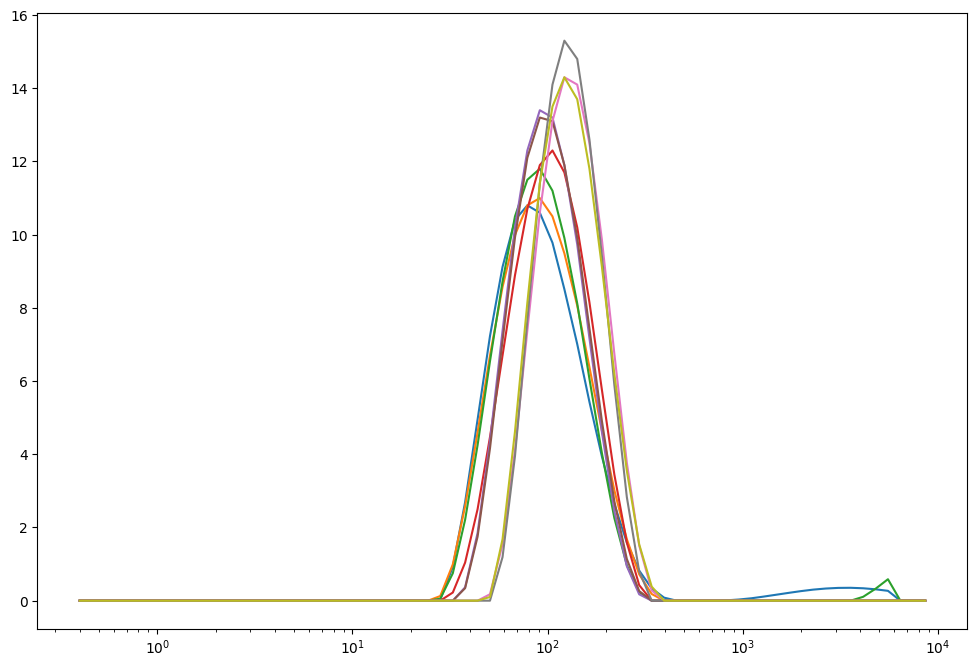

In [14]:
plt.figure(figsize=(12, 8))
for column in size_distrib.columns[1:10]:
    plt.plot(size_distrib['X Intensity'], size_distrib[column], label=column)
plt.xscale('log',base=10)
plt.show()